<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/NeuralNetworks/autoencoder_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential  
from keras import optimizers
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
#import glob
import pylab as pl
from PIL import Image

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['ndim']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# 1. change kernel to GPU 
go to runtime -> change runtime type -> GPU

# digits first

(60000, 28, 28)

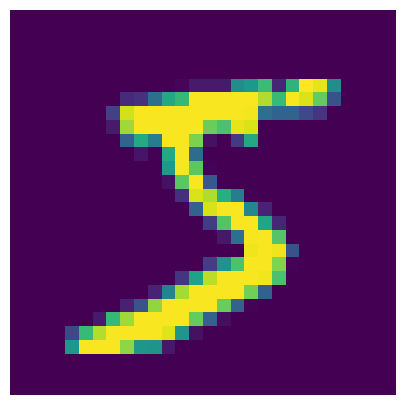

In [ ]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [ ]:
x_train.dtype, x_train.max(), x_train.min()


(dtype('uint8'), 255, 0)

In [ ]:
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [ ]:
xshape = x_train.shape[1]

# create a model

In [ ]:
keras.models?

In [ ]:
model_digits64 = Sequential()
## encoder
model_digits64.add(Dense(256, activation='relu', input_dim=xshape))
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))

In [ ]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))


#alternative syntax
"""
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
"""

'\nencoded = Dense(encoding_dim, activation=\'relu\')(input_img)\n# "decoded" is the lossy reconstruction of the input\ndecoded = Dense(784, activation=\'sigmoid\')(encoded)\n\nautoencoder = Model(input_img, decoded)\n\nencoder = Model(input_img, encoded)\n\n# create a placeholder for an encoded (32-dimensional) input\nencoded_input = Input(shape=(encoding_dim,))\n# retrieve the last layer of the autoencoder model\ndecoder_layer = autoencoder.layers[-1]\n# create the decoder model\ndecoder = Model(encoded_input, decoder_layer(encoded_input))\n'

## losses and activation functions

### regression
- loss='mean_squared_error' L2: default loss to use for regression problems. => linear activation function in output layer, one node out

alternatives:  loss='mean_squared_logarithmic_error', 'mean_absolute_error' (which is L1 instead of L2)
### binary classification

- loss='binary_crossentropy' => sigmoid activation function in output layer, one node out

alternatives: 'hinge'

### multiclass classification
categorical encoded as numerical
- loss='categorical_crossentropy' => softmax n nodes out

onehot encoded categoridal
- 'parse_categorical_crossentropy' => softmax n nodes out

- 'kullback Leibler Divergence Loss' => probabilistic categorical classification; log(P/Q)

## optimizers
- SGD: stocastic gradient descent 
    - nesterov=True -> momentum inclusion
- adam: Adaptive moment estimation. **good in most cases**
- adagrad: different steps for different parameters based on frequency (binary input) well-suited for dealing with sparse data.

- adaDelta: like adagrad but compensated for vanishing learning rate problem

momentum refers to looking one step back and make a decision that includes the slope there



## learning Rate:
generally you need to adjust the learning rate which is how much you change the parameters by at each step. 
keras.optimizers.Adam(lr=0.001)


https://gitcdn.xyz/cdn/Tony607/blog_statics/e1a0b1e060e783bd1978a141acff897ae71bd021/images/optimizer/optimizer.gif

In [ ]:
# choose the optimizer and loss appropriately!
model_digits64.compile(optimizer="adadelta", loss="mean_squared_error")

In [ ]:
print(model_digits64.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 128)               100480    
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1163 - val_loss: 0.1179
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1156 - val_loss: 0.1172
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1150 - val_loss: 0.1166
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1144 - val_loss: 0.1161
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1139 - val_loss: 0.1156
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1135 - val_loss: 0.1152
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1131 - val_loss: 0.1148
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.1127 - val_loss: 0.1145
Epoch 9/20
600/600 [==============================] - 3s 4ms/step - loss: 0.1124 - val_loss: 0.1141
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1121 - val_loss: 0.1138

# always look at the loss!

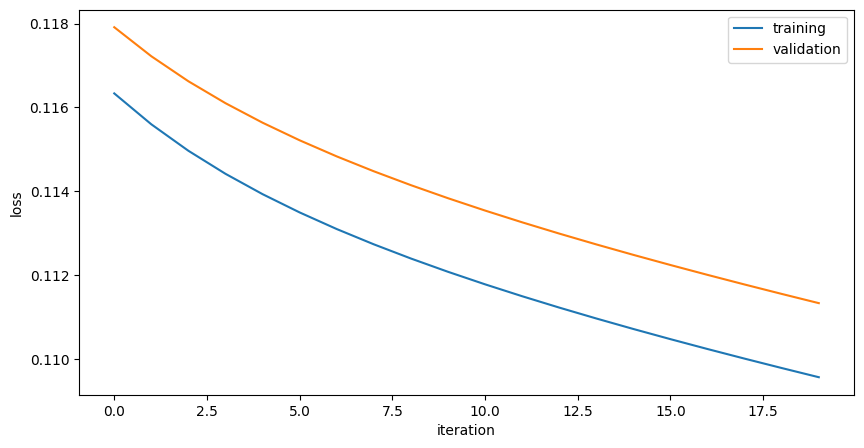

In [ ]:

pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

The loss fuctionis plotted and because it is still decreasingn quite rapidly (slope of the curve not near 0 yet) I know I did not run enough epochs. Try and run for 200 epochs!

# predict

In [ ]:
output_image64 = model_digits64.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


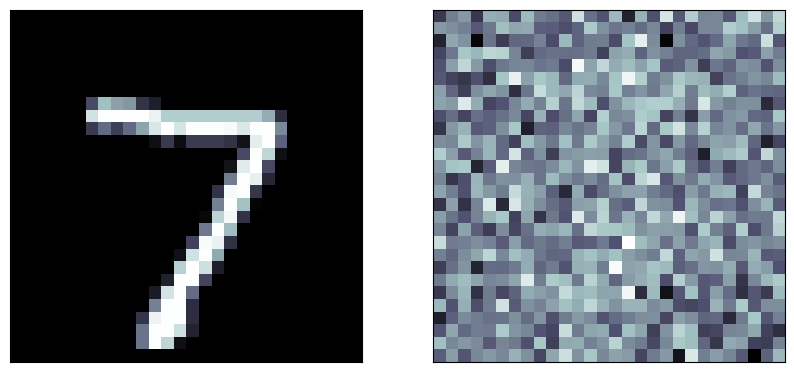

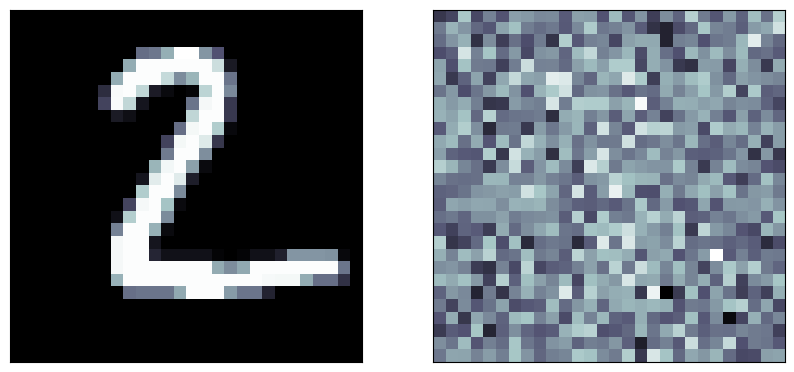

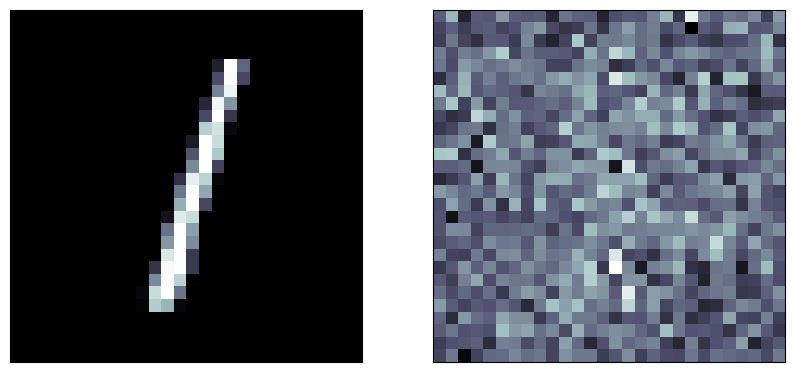

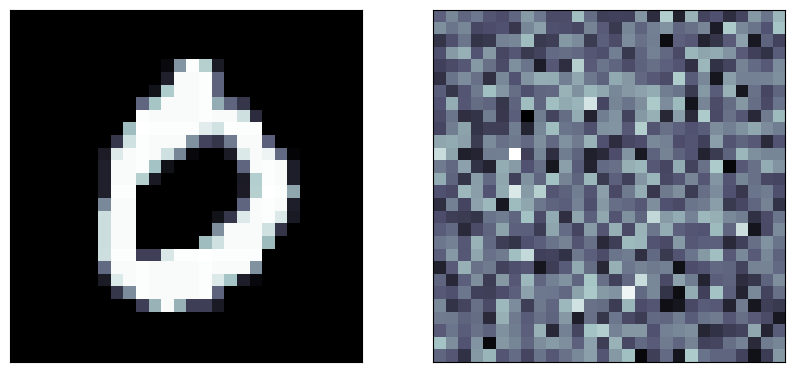

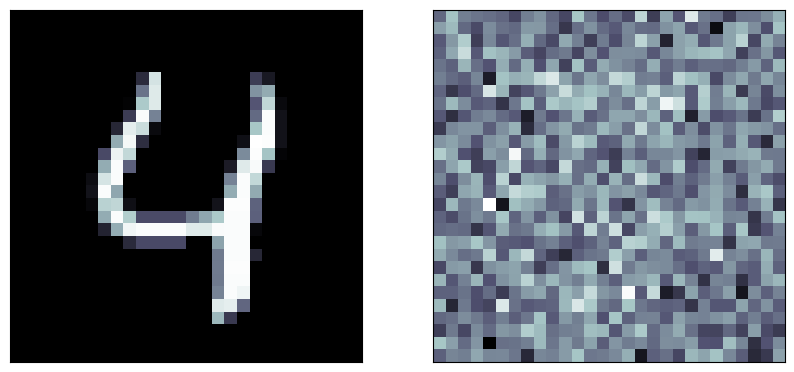

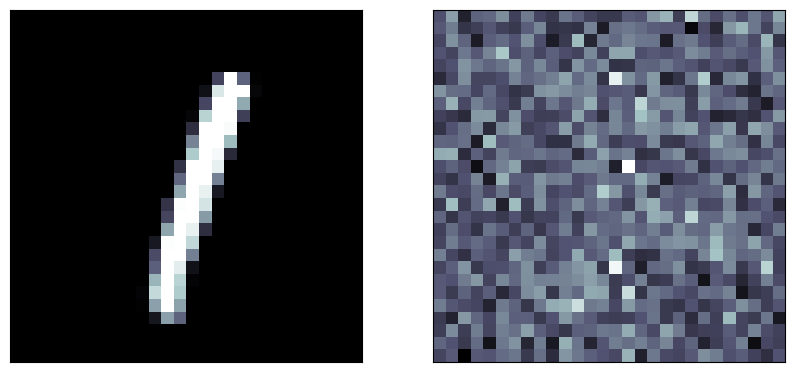

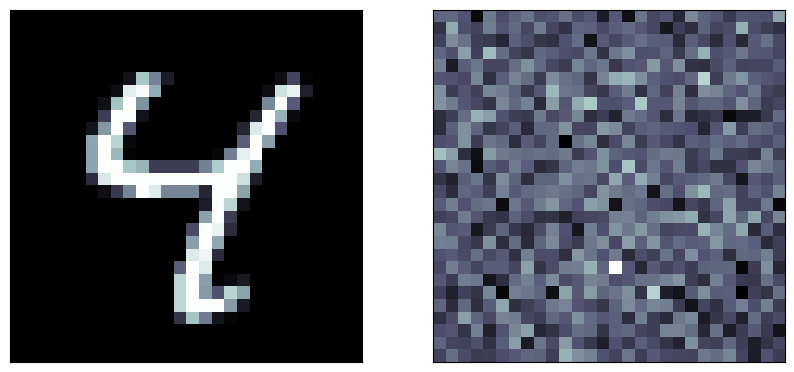

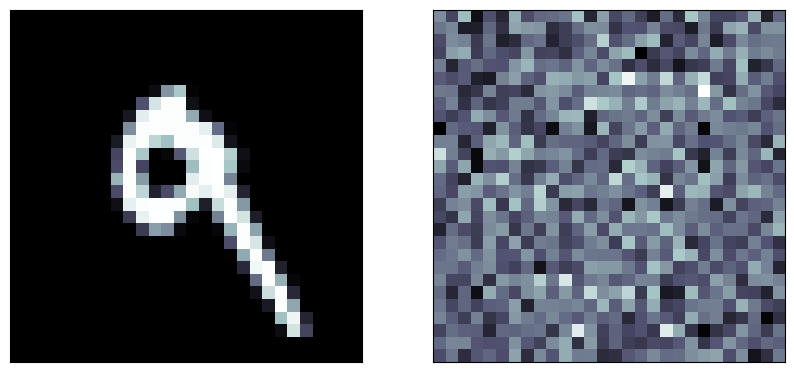

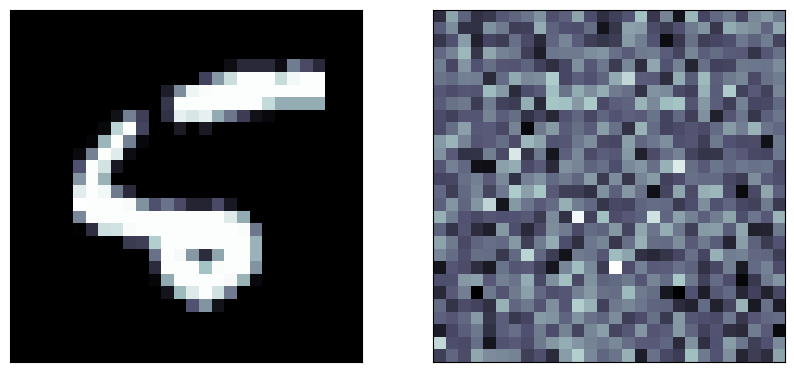

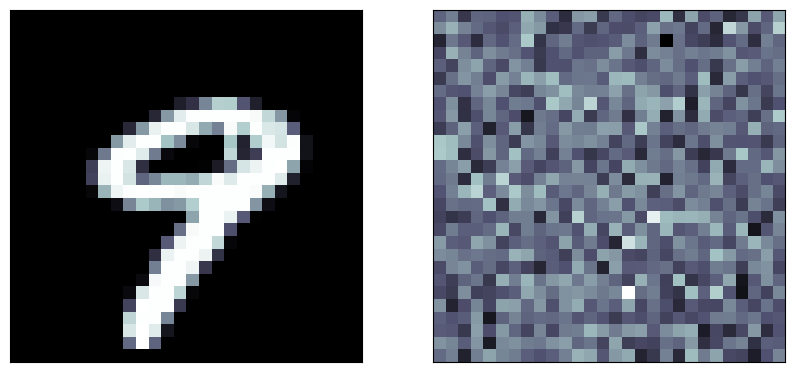

In [ ]:
for i in range(10):
  compareinout(i, output_image64, x_test)

This is a rather bad result. Let me see if I can improve it . The images are too detailed. I can treat the problem as a binary problem to derice some detail. To approach a binary classifier I switch the activation function in the last layer to sigmoid

# train training longer

In [ ]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=40, batch_size=100, verbose=1)

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1094 - val_loss: 0.1111
Epoch 2/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1091 - val_loss: 0.1109
Epoch 3/40
600/600 [==============================] - 3s 5ms/step - loss: 0.1089 - val_loss: 0.1107
Epoch 4/40
600/600 [==============================] - 2s 4ms/step - loss: 0.1087 - val_loss: 0.1105
Epoch 5/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1085 - val_loss: 0.1103
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1083 - val_loss: 0.1101
Epoch 7/40
600/600 [==============================] - 2s 4ms/step - loss: 0.1081 - val_loss: 0.1099
Epoch 8/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1079 - val_loss: 0.1097
Epoch 9/40
600/600 [==============================] - 3s 4ms/step - loss: 0.1077 - val_loss: 0.1095
Epoch 10/40
600/600 [==============================] - 2s 3ms/step - loss: 0.1075 - val_loss: 0.1093

## earlystopping call back

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001)
# This callback will stop the training when there is no improvement in
# the loss for 5 consecutive epochs.
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=80, batch_size=100, 
                               verbose=1, callbacks=[callback])


Epoch 1/80
600/600 [==============================] - 2s 4ms/step - loss: 0.1011 - val_loss: 0.1027
Epoch 2/80
600/600 [==============================] - 2s 3ms/step - loss: 0.1009 - val_loss: 0.1024
Epoch 3/80
600/600 [==============================] - 2s 3ms/step - loss: 0.1006 - val_loss: 0.1022
Epoch 4/80
600/600 [==============================] - 2s 4ms/step - loss: 0.1004 - val_loss: 0.1019
Epoch 5/80
600/600 [==============================] - 2s 4ms/step - loss: 0.1001 - val_loss: 0.1016
Epoch 6/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0998 - val_loss: 0.1013
Epoch 7/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0995 - val_loss: 0.1010
Epoch 8/80
600/600 [==============================] - 2s 4ms/step - loss: 0.0993 - val_loss: 0.1008
Epoch 9/80
600/600 [==============================] - 2s 3ms/step - loss: 0.0990 - val_loss: 0.1005
Epoch 10/80
600/600 [==============================] - 3s 4ms/step - loss: 0.0987 - val_loss: 0.1002

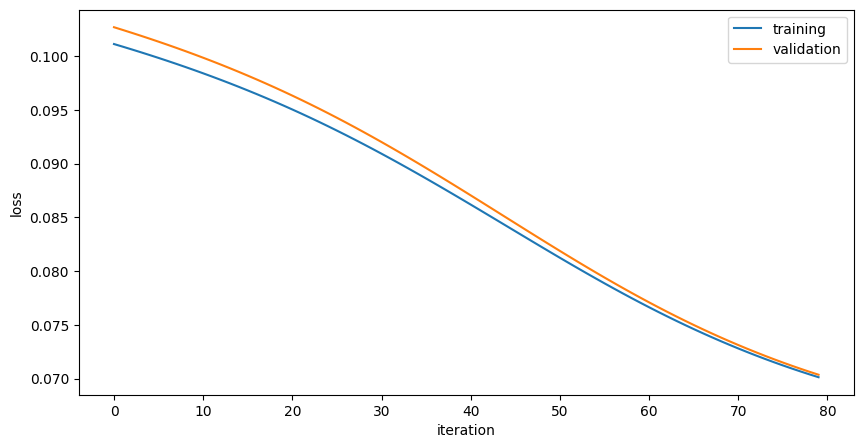

In [ ]:
pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

313/313 [==============================] - 1s 3ms/step


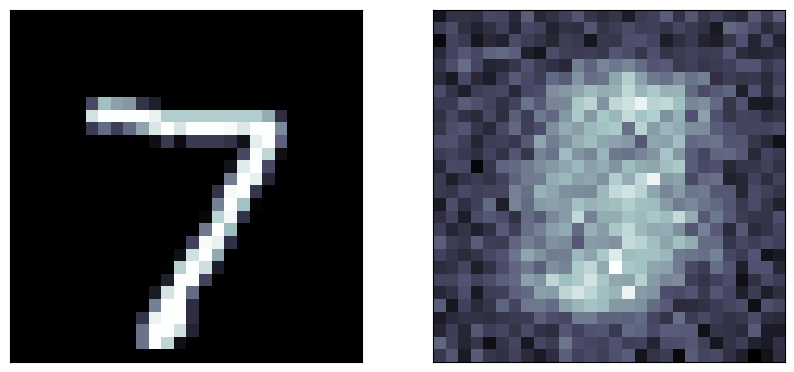

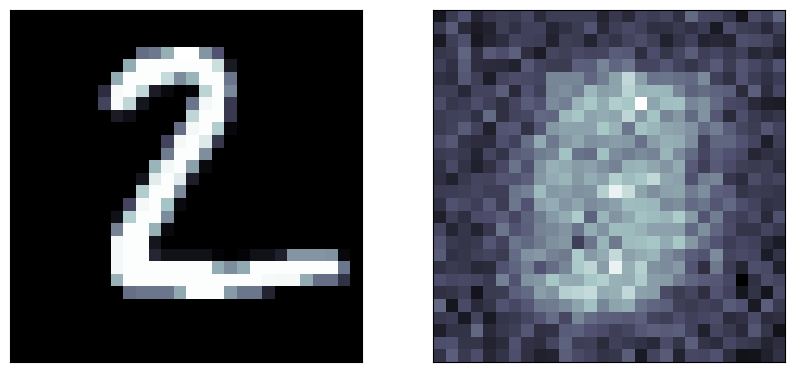

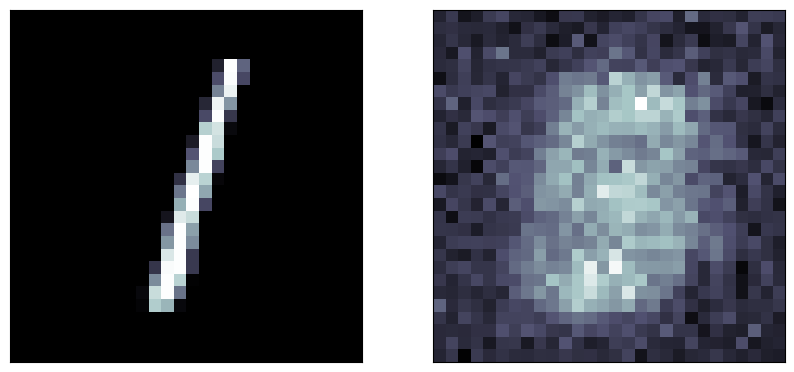

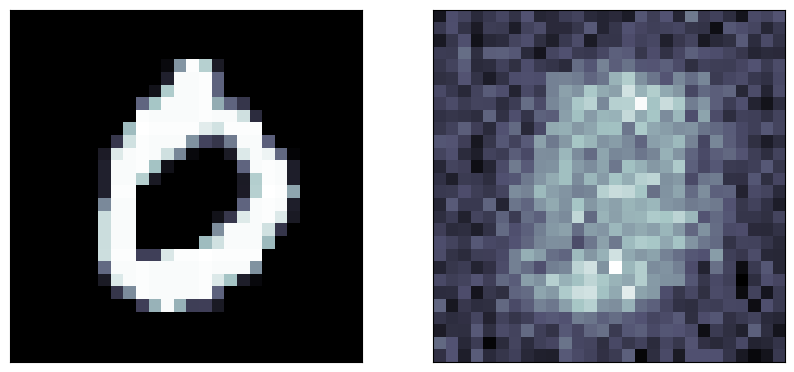

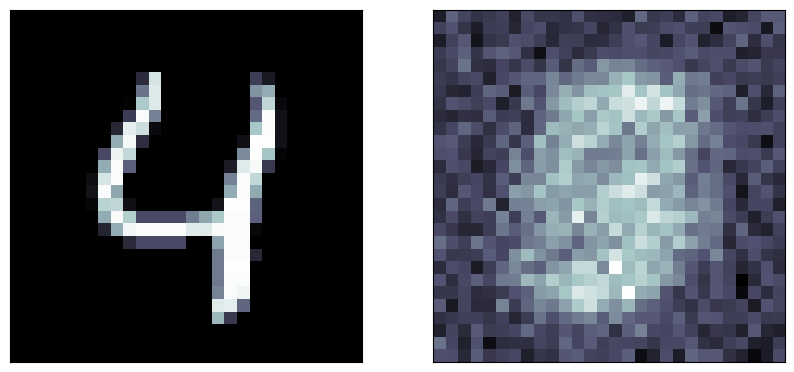

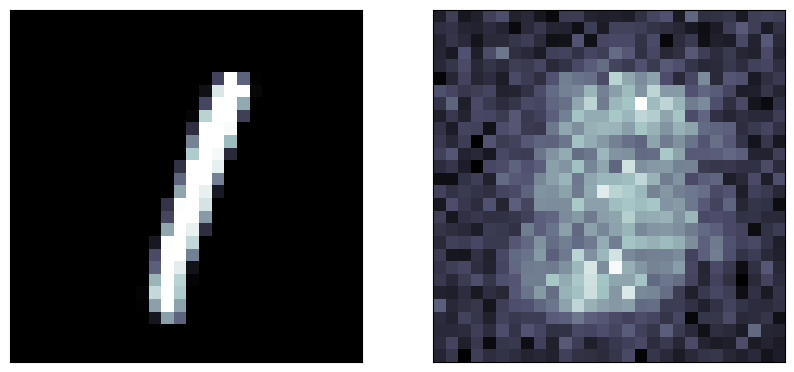

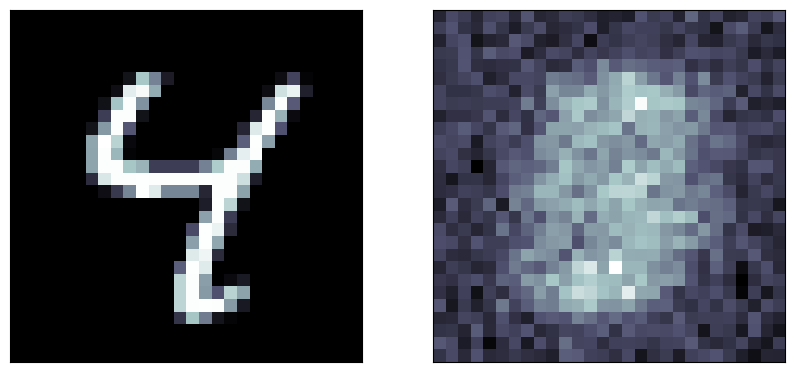

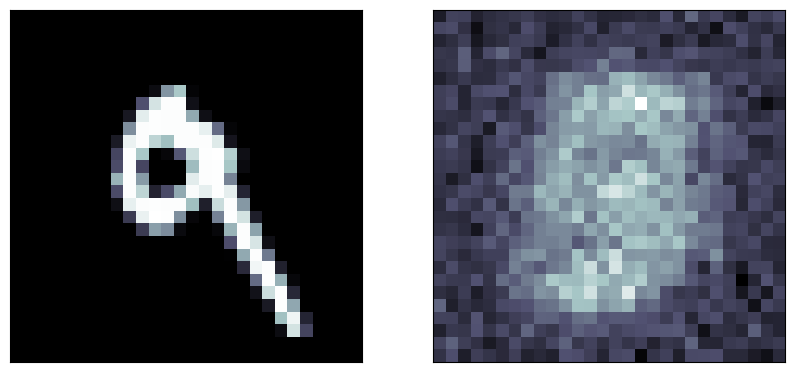

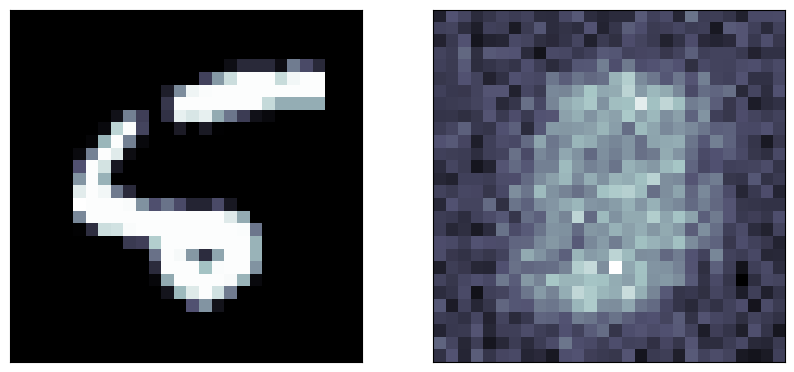

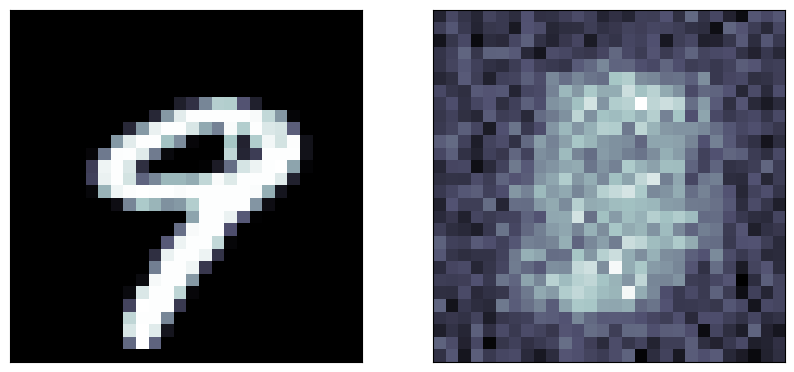

In [ ]:
output_image64 = model_digits64.predict(x_test)
for i in range(10):
  compareinout(i, output_image64, x_test)

## posterior collapse: the autoencoder learned the average of the data

# change the learning rate

In [ ]:
from tensorflow import keras
from keras import optimizers
opt = keras.optimizers.Adam(learning_rate=0.01)
model_digits64.compile(loss="mean_squared_error", optimizer=opt)
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=20, batch_size=100, verbose=1)

Epoch 1/20
600/600 [==============================] - 5s 5ms/step - loss: 0.0277 - val_loss: 0.0216
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0215 - val_loss: 0.0205
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0207 - val_loss: 0.0205
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0202 - val_loss: 0.0199
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0199 - val_loss: 0.0191
Epoch 6/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0197 - val_loss: 0.0191
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0195 - val_loss: 0.0193
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0193 - val_loss: 0.0188
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0189 - val_loss: 0.0188
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0188 - val_loss: 0.0189

313/313 [==============================] - 1s 2ms/step


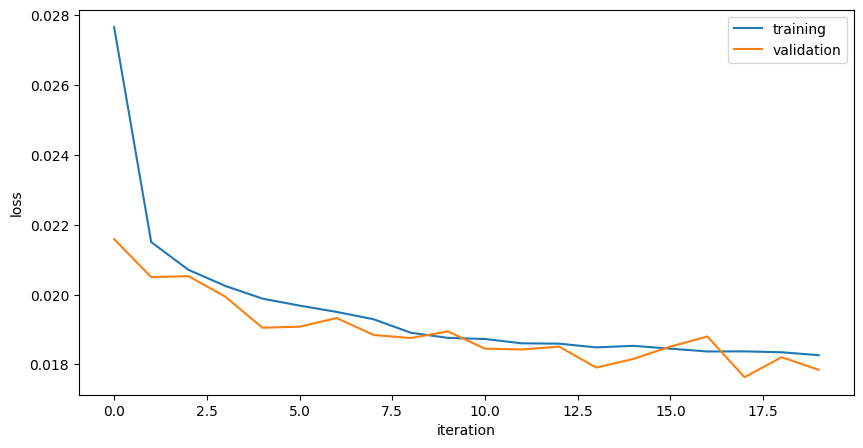

In [ ]:
output_image64 = model_digits64.predict(x_test)
pl.plot(np.array(history64.history['loss']), label="training")
pl.plot(np.array(history64.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()

#pl.yscale('log')
#pl.xscale('log')

A noisier loss function is not a bad sign! the model is overall learning - decreasing the learning rate would give a smoother loss

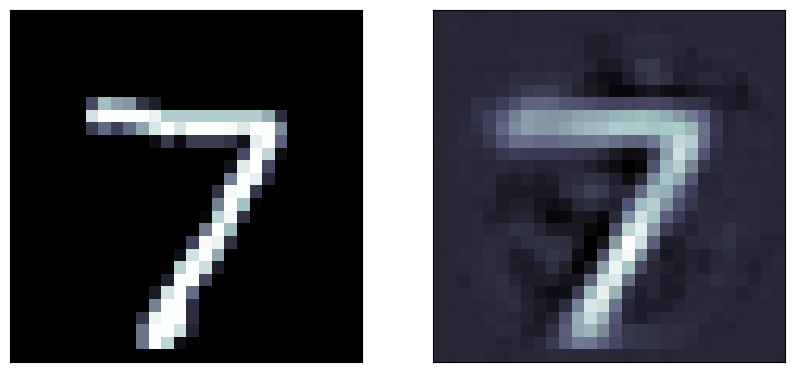

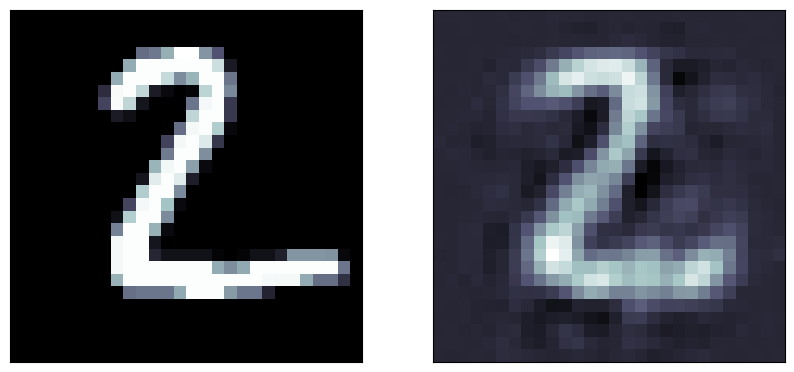

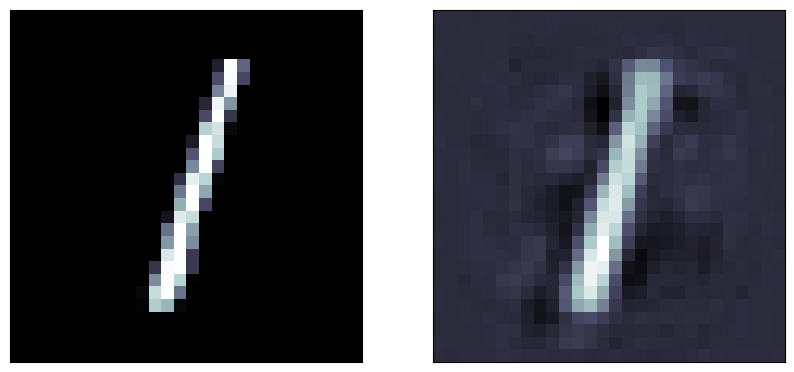

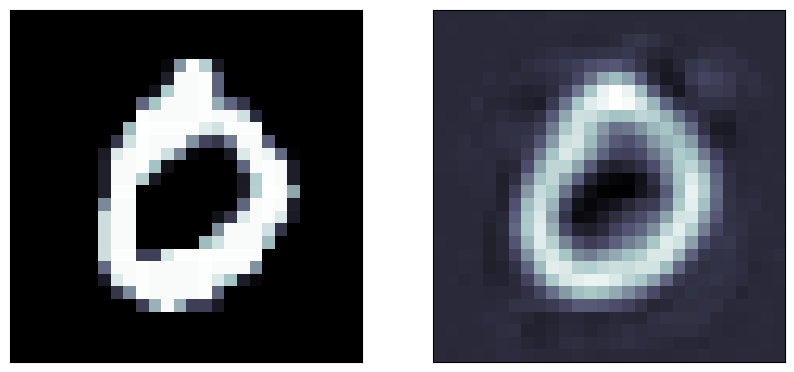

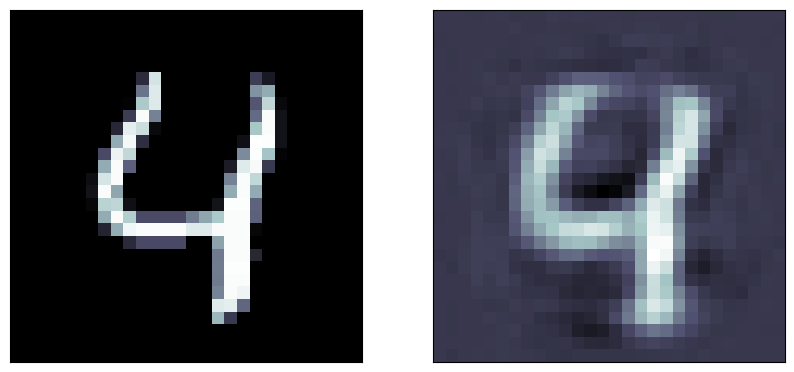

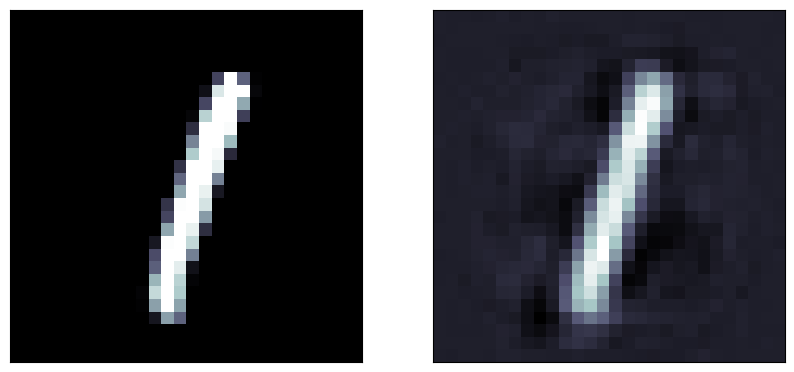

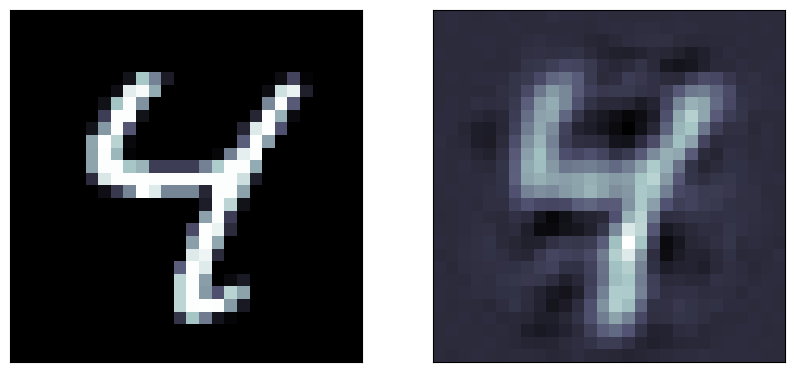

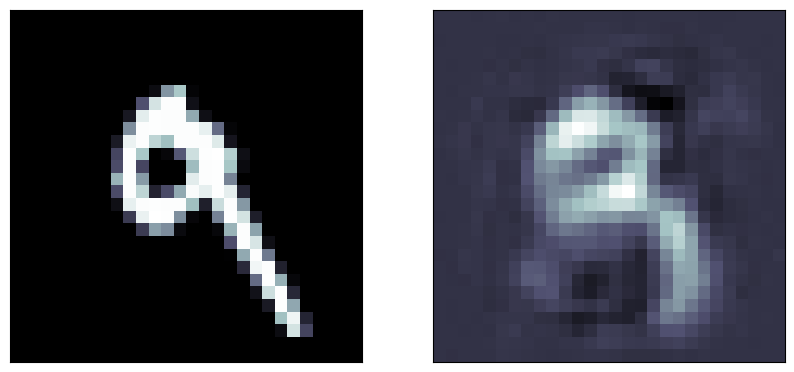

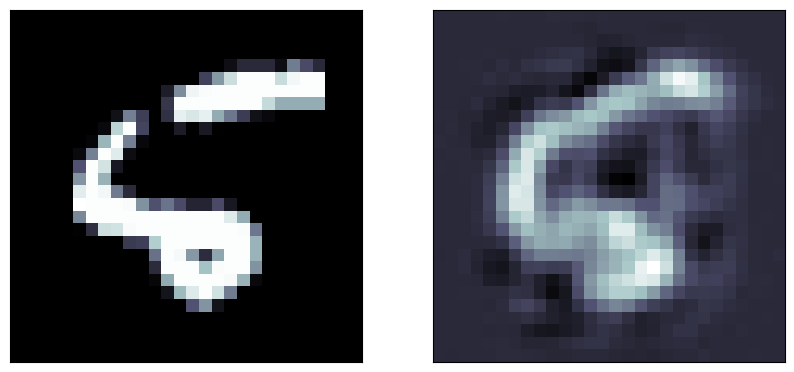

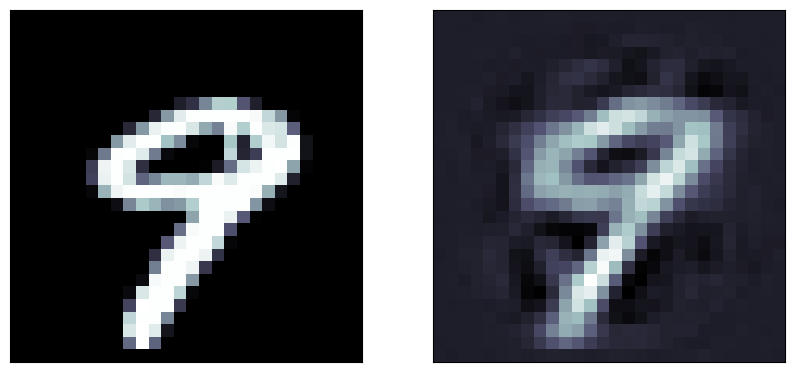

In [ ]:
for i in range(10):
  compareinout(i, output_image64, x_test)

# change activation function on the last layer

In [ ]:
model_digits64_sig = Sequential()
## encoder
# input layer and the output size
model_digits64_sig.add(Dense(128, activation='relu', input_dim=xshape))
#compression layer
model_digits64_sig.add(Dense(64, activation='relu'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64_sig.add(Dense(128, activation='relu'))
#output layer, same size as input
model_digits64_sig.add(Dense(ndim, activation='sigmoid'))

opt = keras.optimizers.Adam(learning_rate=0.001)
model_digits64_sig.compile(loss="mean_squared_error", optimizer=opt)
history64_sig = model_digits64_sig.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=40, batch_size=100, verbose=1,
                               callbacks=[callback])


Epoch 1/40
600/600 [==============================] - 5s 5ms/step - loss: 0.0375 - val_loss: 0.0172
Epoch 2/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0142 - val_loss: 0.0120
Epoch 3/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 4/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0093 - val_loss: 0.0084
Epoch 5/40
600/600 [==============================] - 3s 4ms/step - loss: 0.0083 - val_loss: 0.0076
Epoch 6/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 7/40
600/600 [==============================] - 2s 4ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 8/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 9/40
600/600 [==============================] - 2s 3ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 10/40
600/600 [==============================] - 3s 5ms/step - loss: 0.0060 - val_loss: 0.0057

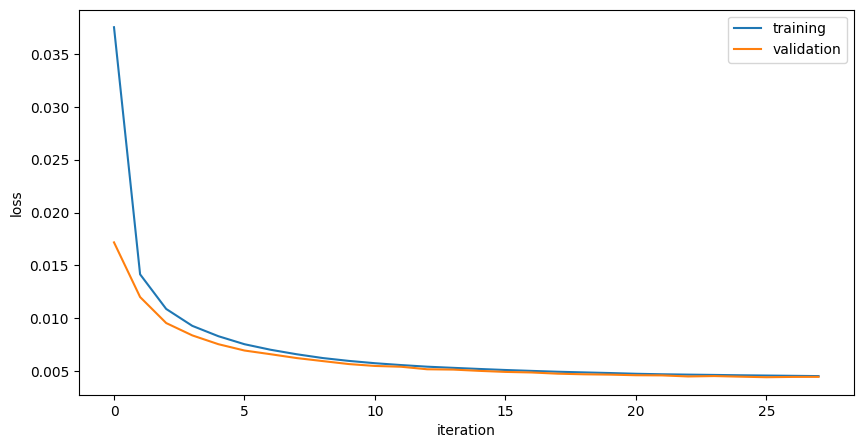

In [ ]:
pl.plot(np.array(history64_sig.history['loss']), label="training")
pl.plot(np.array(history64_sig.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

The loss function got quite flat. This model has converged (or nearly so)

313/313 [==============================] - 1s 2ms/step


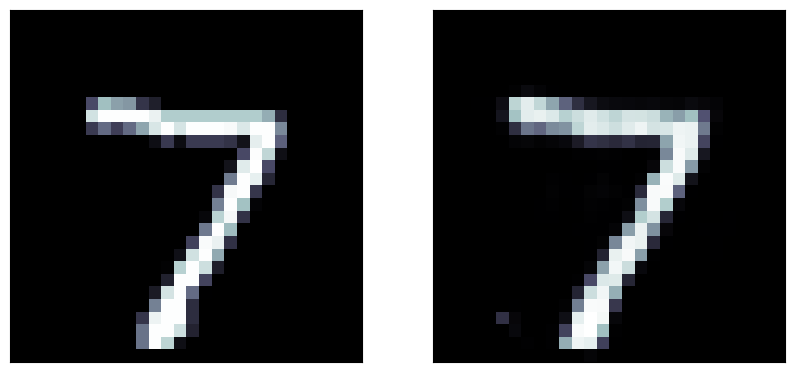

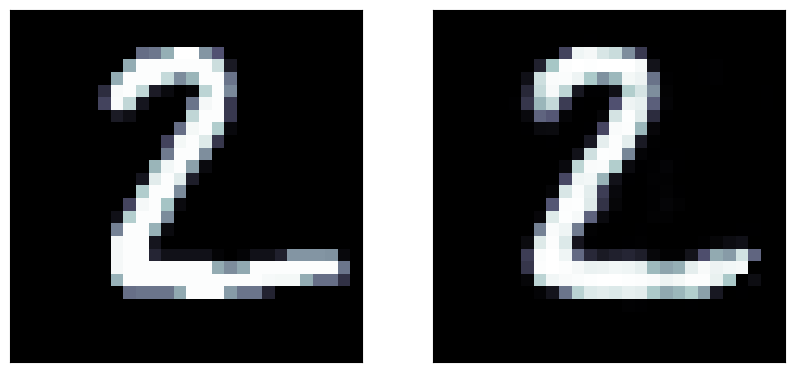

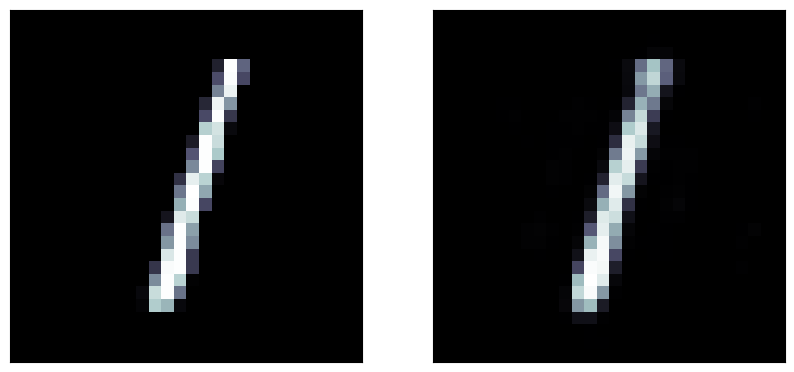

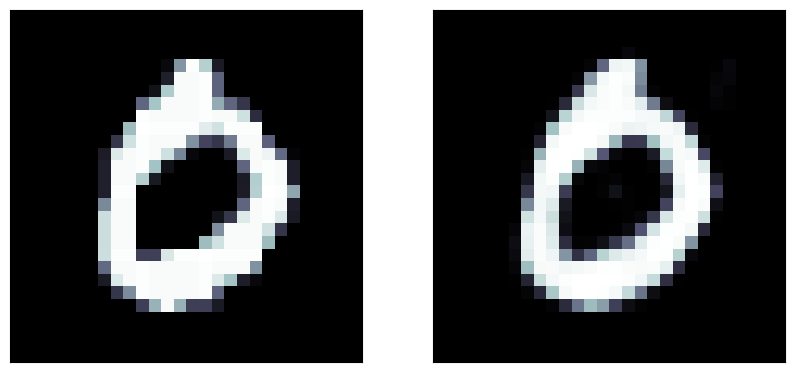

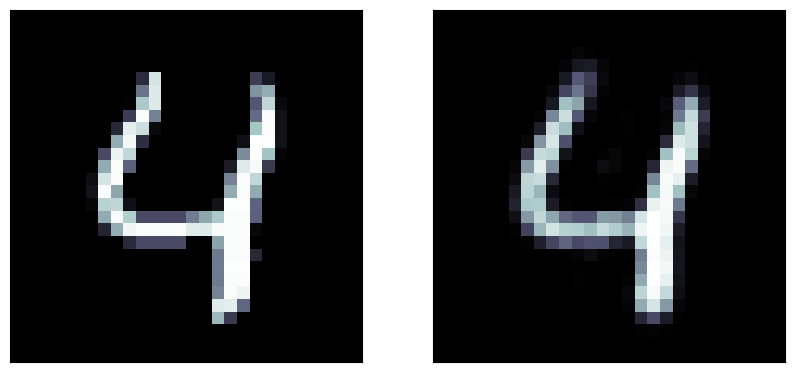

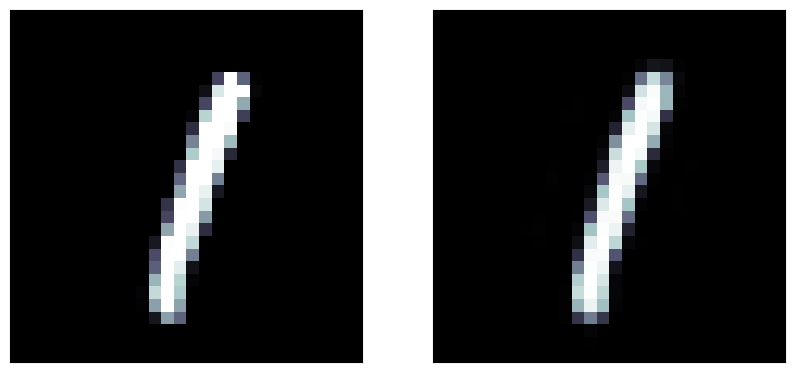

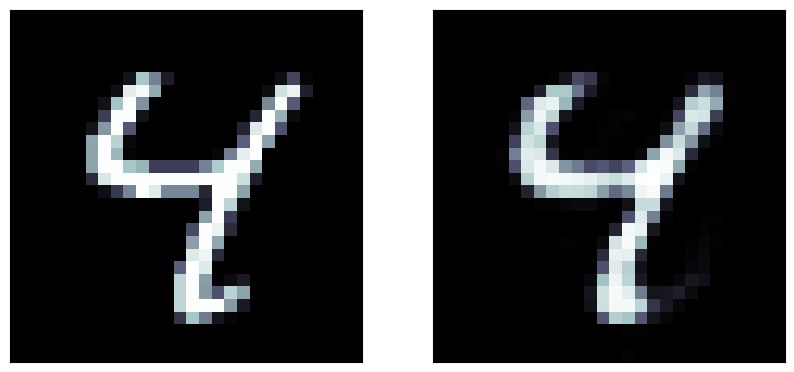

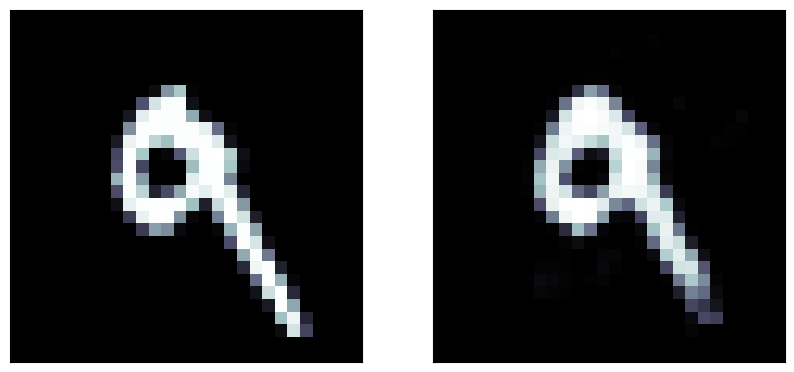

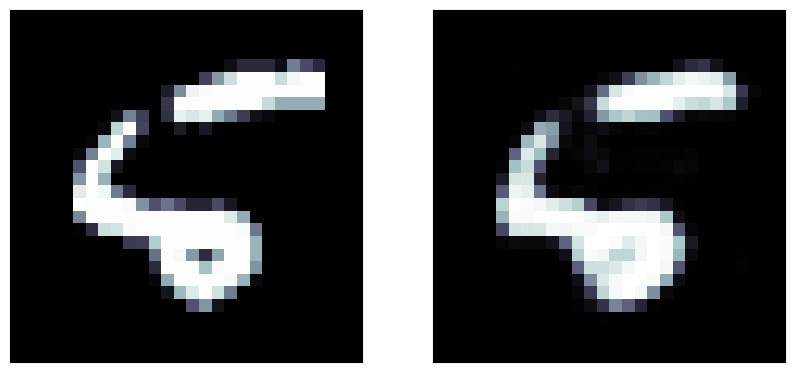

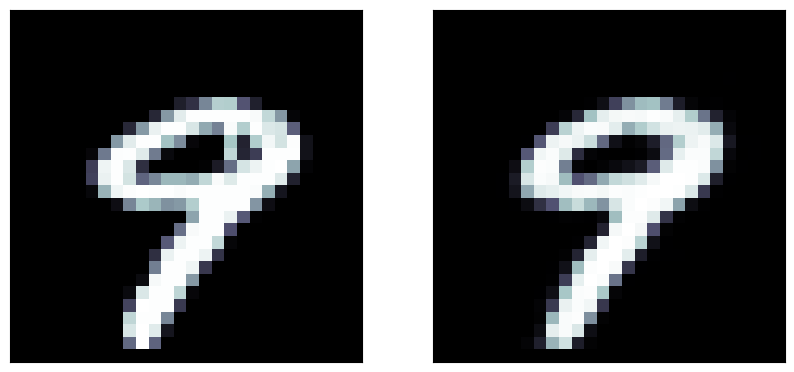

In [ ]:

output_image64_sig = model_digits64_sig.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_sig, x_test)

Much better! Let me choose a loss fuction that is more appropriate for a binary classificaton - this is not a binary task but the gradient in the data is significant.

In [ ]:
# sigmoid and binary cross entropy loss
model_digits64_bce = model_digits64_sig

In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.1)
model_digits64_bce.compile(optimizer=opt, loss="binary_crossentropy")
history64_bce = model_digits64_bce.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=20, batch_size=100, verbose=1, 
                                       callbacks=[callback])


Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 0.0768 - val_loss: 0.0759
Epoch 2/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0764 - val_loss: 0.0757
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0762 - val_loss: 0.0755
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0761 - val_loss: 0.0754
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.0759 - val_loss: 0.0753
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0758 - val_loss: 0.0752
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0757 - val_loss: 0.0751
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0756 - val_loss: 0.0750
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0755 - val_loss: 0.0749
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0754 - val_loss: 0.0748

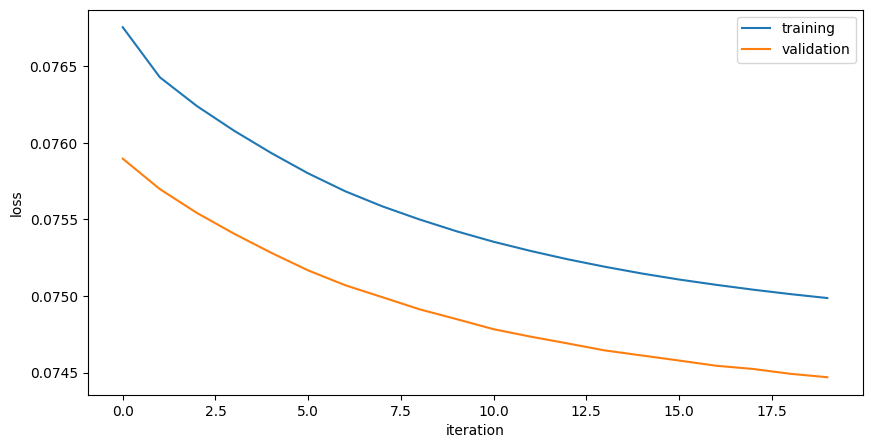

In [ ]:
pl.plot(np.array(history64_bce.history['loss']), label="training")
pl.plot(np.array(history64_bce.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

This loss fuction is also decreasing steeply. Too few epochs!

In [ ]:
output_image64_bce =  v.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

NameError: ignored

This is a pretty good result!

# try more compression

Now we shrink the bottle neck to 16 neurons: a much more ambitions model!

In [ ]:
model_digits16 = Sequential()
#encoder
model_digits16.add(Dense(128, activation='relu', input_dim=xshape))
model_digits16.add(Dense(64, activation='relu'))
model_digits16.add(Dense(32, activation='relu'))
#bottle neck
model_digits16.add(Dense(16, activation='relu'))
#decoder
model_digits16.add(Dense(32, activation='relu'))
model_digits16.add(Dense(64, activation='relu'))
model_digits16.add(Dense(128, activation='relu'))
model_digits16.add(Dense(xshape, activation='sigmoid'))


In [ ]:
opt = keras.optimizers.Adadelta(learning_rate=0.1)
model_digits16.compile(optimizer=opt, loss="binary_crossentropy")

In [ ]:
print(model_digits16.summary())

In [ ]:
history16_bce = model_digits16.fit(x_train, x_train, 
                           validation_data=(x_test, x_test),
                           epochs=200, batch_size=100, 
                           verbose=1)


In [ ]:
pl.plot(np.array(history16_bce.history['loss']), label="training")
pl.plot(np.array(history16_bce.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

In [ ]:
history16_bce = model_digits16.fit(x_train, x_train, 
                           validation_data=(x_test, x_test),
                           epochs=2000, batch_size=100, 
                           verbose=1, callbacks=[callback])


the loss fuction: once again it did not finish learning. 

In [ ]:
output_image = model_digits16.predict(x_test)

for i in range(10):
  compareinout(i, output_image, x_test)

The result is not bad! The decoder can recreate the image from only 16 numbers!

# Extract feature

In [ ]:
from keras import backend as K
# input placeholder
inp = model_digits16.input                   
# extract the bottle neck outputs
outputs = model_digits16.layers[3].output     
# create a function to evaluate the output of the bottle neck layer for a given input
functors = K.function([inp], [outputs])    

# Testing
layer_outs = functors(x_test[:1])
pl.imshow(layer_outs[0]);

This is the reducted representation of the first image in the test sample: a 16-values representation of the NxN pixel image

In [ ]:
def compareinout_encoded(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize(10,5))
  ax = fig.add_subplot(131) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(132)
  pl.imshow(functors(testimg[i:i+1])[0])
  pl.yticks([])
  ax = fig.add_subplot(133) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


In [ ]:
for i in range(10):
  compareinout_encoded(i, output_image, x_test)



left: original image

center: compressed representation

right: predicted image

# None of these models overfit. lets overfit them on purpose

In [ ]:

history16_overfit = model_digits16.fit(x_train, x_train, 
                                       validation_data=(x_test, x_test), 
                                       epochs=400, batch_size=100, verbose=1)

In [ ]:
pl.plot(np.array(history16_overfit.history['loss']), label="training")
pl.plot(np.array(history16_overfit.history['val_loss']), label="validation")
pl.ylabel('loss')
pl.xlabel('iteration')
pl.legend()
#pl.yscale('log')
#pl.xscale('log')

output_image16_bce = model_digits16_bce.predict(x_test)
for i in range(10):
  compareinout(i, output_image64_bce, x_test)

The loss function still decreases by the validation loss function is flat or increases: sign of overfitting - we are learning non-generalizable properties of the training set